In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Classified Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [79]:
df_x = df.iloc[:,1:-1]
df_y = df.iloc[:,-1:]

In [80]:
df_x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
df_x = pd.DataFrame(scaler.fit_transform(df_x),columns=df_x.columns)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(x_train, y_train.values[:,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_pred = knn.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
print(accuracy_score(y_test, y_pred))

0.9466666666666667


In [13]:
print(confusion_matrix(y_test, y_pred))

[[140   9]
 [  7 144]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       149
           1       0.94      0.95      0.95       151

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [16]:
knn_error_rate = []
for i in np.arange(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values[:,0])
    knn_error_rate.append(1-accuracy_score(y_test, knn.predict(x_test)))

In [25]:
print(pd.DataFrame(list(knn_error_rate)))

           0
0   0.083333
1   0.076667
2   0.060000
3   0.050000
4   0.053333
5   0.050000
6   0.060000
7   0.053333
8   0.066667
9   0.063333
10  0.073333
11  0.066667
12  0.063333
13  0.060000
14  0.060000
15  0.056667
16  0.053333
17  0.053333
18  0.056667
19  0.050000
20  0.060000
21  0.053333
22  0.060000
23  0.060000
24  0.060000
25  0.053333
26  0.060000
27  0.056667
28  0.053333
29  0.056667
30  0.053333
31  0.053333
32  0.053333
33  0.050000
34  0.050000
35  0.046667
36  0.046667
37  0.046667
38  0.050000


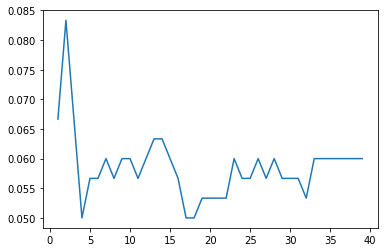

In [19]:
sns.lineplot(y=knn_error_rate, x=np.arange(1,40))
plt.show()

In [26]:
for i in [1, 35]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values[:,0])
    y_pred = knn.predict(x_test)
    print('For',i)
    print('accuracy score:', accuracy_score(y_test, y_pred))
    print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('classification report:\n', classification_report(y_test, y_pred))

For 1
accuracy score 0.9166666666666666
confusion matrix [[137  12]
 [ 13 138]]
classification report               precision    recall  f1-score   support

           0       0.91      0.92      0.92       149
           1       0.92      0.91      0.92       151

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

For 35
accuracy score 0.95
confusion matrix [[138  11]
 [  4 147]]
classification report               precision    recall  f1-score   support

           0       0.97      0.93      0.95       149
           1       0.93      0.97      0.95       151

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



accuracy score 0.9333333333333333
accuracy score 0.9566666666666667
accuracy score 0.9366666666666666
accuracy score 0.94
accuracy score 0.9633333333333334
accuracy score 0.9333333333333333
accuracy score 0.9366666666666666
accuracy score 0.9533333333333334
accuracy score 0.95


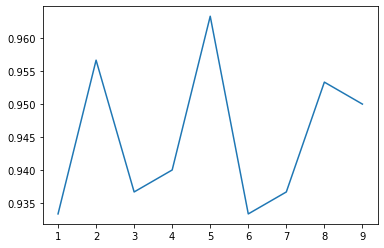

In [171]:
accuracy_scores = []
knn = KNeighborsClassifier(n_neighbors=35)
from sklearn.decomposition import PCA
for i in np.arange(1,len(df_x.columns)):
    features = PCA(n_components=i)
    x = pd.DataFrame(features.fit_transform(df_x))
    #x_train, x_test, y_train, y_test = x.iloc[:700,], x.iloc[700:,], df_y.iloc[:700,], df_y.iloc[700:,]
    x_train, x_test, y_train, y_test = train_test_split(x, df_y, test_size = 0.3)
    knn.fit(x_train, y_train.values[:,0])
    y_pred = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print('accuracy score', accuracy_score(y_test, y_pred))
sns.lineplot(np.arange(1,len(df_x.columns)),accuracy_scores)
plt.show()

In [140]:
features = PCA(n_components=6)
x = pd.DataFrame(features.fit_transform(df_x))
x_train, x_test, y_train, y_test = x.iloc[:700,], x.iloc[700:,], df_y.iloc[:700,], df_y.iloc[700:,]
knn.fit(x_train, y_train.values[:,0])
y_pred = knn.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score: 0.9733333333333334
confusion matrix:
 [[137   5]
 [  3 155]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       142
           1       0.97      0.98      0.97       158

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [220]:
features = PCA(n_components=5)
x = pd.DataFrame(features.fit_transform(df_x))
x_train, x_test, y_train, y_test = train_test_split(x, df_y, test_size = 0.3)
knn.fit(x_train, y_train.values[:,0])
y_pred = knn.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score: 0.9466666666666667
confusion matrix:
 [[141  10]
 [  6 143]]
classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       151
           1       0.93      0.96      0.95       149

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [221]:
from sklearn.model_selection import cross_val_score
cross_val_score(features,df_x,df_y,cv=10,fit_params=)

In [137]:
len(df_x.columns)

10

In [42]:
fe = pd.DataFrame(best_fits.components_)
fe

,0,1,2,3,4,5,6,7,8,9
0,0.411824,-0.358190,-0.416583,-0.020316,-0.175251,-0.282365,-0.176363,-0.424937,0.435986,-0.126272
1,0.112775,0.089832,0.019042,-0.730953,0.026775,0.023361,0.174237,0.046194,-0.090945,-0.634453
2,-0.196860,-0.006644,-0.242603,0.326468,-0.544112,0.258737,0.552307,0.115781,0.163268,-0.296070
3,0.025007,-0.109424,-0.160335,0.127428,0.708197,-0.116287,0.635283,-0.149243,0.065079,0.017205
4,-0.038615,0.174352,-0.059038,0.394418,0.386166,0.321762,-0.426649,0.073184,0.242763,-0.556853


In [107]:
fe.iloc[0:1,]

,0,1,2,3,4,5,6,7,8,9
0,0.411824,-0.35819,-0.416583,-0.020316,-0.175251,-0.282365,-0.176363,-0.424937,0.435986,-0.126272


In [108]:
pd.DataFrame(df_x.iloc[0:1,].values, columns=np.arange(0,10))

,0,1,2,3,4,5,6,7,8,9
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409


In [109]:
pd.DataFrame(df_x.iloc[0:1,].values, columns=np.arange(0,10)).mul(fe.iloc[0:1,],axis=0)

,0,1,2,3,4,5,6,7,8,9
0,0.376373,-0.416243,-0.236597,-0.015348,-0.136847,-0.099564,-0.133982,-0.273573,0.383416,-0.155493


In [120]:
np.sum(pd.DataFrame(df_x.iloc[0:1,].values, columns=np.arange(0,10)).mul(fe.iloc[0:1,],axis=0))

0    0.376373
1   -0.416243
2   -0.236597
3   -0.015348
4   -0.136847
5   -0.099564
6   -0.133982
7   -0.273573
8    0.383416
9   -0.155493
dtype: float64

In [74]:
np.sum([1,2])

3

In [41]:
df_x.mul()

,0,1,2,3,4
0,1.527495,-0.043019,-0.263301,-0.659036,-0.564665
1,-0.066964,-1.120431,-0.521265,-0.712519,-0.599764
2,-1.527426,0.196820,0.465438,3.089216,-0.169043
3,0.176282,0.635964,1.435702,1.455466,0.723647
4,2.054977,-0.134739,-0.509409,1.568141,-0.383621
5,-2.870174,-1.013469,0.393644,0.593024,-0.438221
6,0.674794,1.981520,-1.104617,-0.280770,-0.682020
7,-0.713499,1.289502,0.170039,-0.246398,-1.133699
8,-0.836574,1.548796,0.532268,-1.582792,-0.079974
9,1.592619,0.093623,0.606860,2.438305,1.441504
